In [644]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('C:/Local/python-training/Day-8/diabetes.csv', sep=',')

In [645]:
# 1. Check df.shape
df.shape

(520, 18)

In [646]:
# 2. Check df.columns
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_##$weight_loss',
       'weakness', 'polyphagia', 'Heart rate$$$', 'genital_thrush',
       'visual_blurring', 'itching', 'irritability', 'delayed_healing',
       'partial_paresis', 'muscle_stif02344393939fness', 'alopecia', 'obesity',
       'class'],
      dtype='object')

In [647]:
# 3. Check df.dtypes
df.dtypes

age                              int64
gender                          object
polyuria                         int64
polydipsia                       int64
sudden_##$weight_loss            int64
weakness                         int64
polyphagia                       int64
Heart rate$$$                  float64
genital_thrush                   int64
visual_blurring                  int64
itching                          int64
irritability                    object
delayed_healing                 object
partial_paresis                  int64
muscle_stif02344393939fness    float64
alopecia                         int64
obesity                          int64
class                           object
dtype: object

In [648]:
# 4. Remove special chars from column names

# Define a regular expression pattern to match special characters
specialchar_pattern = r'[@$#_]'
num_pattern = r'[0-9]'

# Remove special characters from column names
df.columns = df.columns.str.replace(specialchar_pattern, '', regex=True)
df.columns = df.columns.str.replace(num_pattern, '', regex=True)
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'suddenweightloss',
       'weakness', 'polyphagia', 'Heart rate', 'genitalthrush',
       'visualblurring', 'itching', 'irritability', 'delayedhealing',
       'partialparesis', 'musclestiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [649]:
# 5. Remove leading and trailing spaces from colmun names
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'suddenweightloss',
       'weakness', 'polyphagia', 'Heart rate', 'genitalthrush',
       'visualblurring', 'itching', 'irritability', 'delayedhealing',
       'partialparesis', 'musclestiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [650]:
df

,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,Heart rate,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,120.0,0,0,1,0,1,0,1.0,1,1,1
1,58,MALE,0,0,0,1,0,NaN,0,1,0,0,0,1,0.0,1,0,1
2,41,MALE,1,0,0,1,1,NaN,0,0,1,0,1,0,1.0,1,0,1
3,45,Male,0,0,1,1,1,NaN,1,0,1,0,1,0,0.0,0,0,1
4,60,Male,1,1,1,1,1,120.0,0,1,1,1,1,1,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,NaN,0,0,1,0,1,1,0.0,0,0,1
516,48,Female,1,1,1,1,1,NaN,0,0,1,1,1,1,0.0,0,0,1
517,58,Female,1,1,1,1,1,NaN,0,1,0,0,0,1,1.0,0,1,1
518,32,Female,0,0,0,1,0,NaN,0,1,1,0,1,0,0.0,1,0,0


In [651]:
# 6. Remove rows where special chars are present

# Define a regular expression pattern to match special characters
specialchar_pattern = r'[?!@#$%^&*()]'

# Create a boolean mask for rows containing special characters
'''
We create a boolean mask contains_special_chars using .apply() and .str.contains(). 
This mask checks each row for the presence of special characters in any column. 
The any() method checks if at least one column in a row contains a special character.
'''
contains_special_chars = df.apply(lambda row: row.str.contains(specialchar_pattern).any(), axis=1)

# Remove rows with special characters
'''
We use boolean indexing to create a new DataFrame raw_cleaned that includes only the rows where special characters are not present 
(~contains_special_chars).
'''
df = df[~contains_special_chars]
df

,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,Heart rate,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,120.0,0,0,1,0,1,0,1.0,1,1,1
1,58,MALE,0,0,0,1,0,NaN,0,1,0,0,0,1,0.0,1,0,1
2,41,MALE,1,0,0,1,1,NaN,0,0,1,0,1,0,1.0,1,0,1
3,45,Male,0,0,1,1,1,NaN,1,0,1,0,1,0,0.0,0,0,1
4,60,Male,1,1,1,1,1,120.0,0,1,1,1,1,1,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,NaN,0,0,1,0,1,1,0.0,0,0,1
516,48,Female,1,1,1,1,1,NaN,0,0,1,1,1,1,0.0,0,0,1
517,58,Female,1,1,1,1,1,NaN,0,1,0,0,0,1,1.0,0,1,1
518,32,Female,0,0,0,1,0,NaN,0,1,1,0,1,0,0.0,1,0,0


In [652]:
# 8. Check the count of missing vallues in the colmuns
missing_values_count = df.isna().sum() # You can also use raw.isnull().sum()
missing_values_count


age                   0
gender                0
polyuria              0
polydipsia            0
suddenweightloss      0
weakness              0
polyphagia            0
Heart rate          510
genitalthrush         0
visualblurring        0
itching               0
irritability          0
delayedhealing        0
partialparesis        0
musclestiffness       6
alopecia              0
obesity               0
class                 0
dtype: int64

In [653]:
# 9. Check the missing value ratio in every column
df.isna().sum()/len(df)

age                 0.000000
gender              0.000000
polyuria            0.000000
polydipsia          0.000000
suddenweightloss    0.000000
weakness            0.000000
polyphagia          0.000000
Heart rate          0.986460
genitalthrush       0.000000
visualblurring      0.000000
itching             0.000000
irritability        0.000000
delayedhealing      0.000000
partialparesis      0.000000
musclestiffness     0.011605
alopecia            0.000000
obesity             0.000000
class               0.000000
dtype: float64

In [654]:
# 10. If the missing value ratio is >=0.3 delete the column
columns_to_drop = [col for col in df.columns if df[col].isna().sum()/len(df) >= 0.3]
df = df.drop(columns=columns_to_drop)
df

,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1.0,1,1,1
1,58,MALE,0,0,0,1,0,0,1,0,0,0,1,0.0,1,0,1
2,41,MALE,1,0,0,1,1,0,0,1,0,1,0,1.0,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0.0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0.0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0.0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1.0,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0.0,1,0,0


In [655]:
# 7. Convert catagorical dependent variable to numbers
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['gender'] = df['gender'].str.upper()
df['gender'] = label_encoder.fit_transform(df['gender'])
df


,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1.0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0.0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1.0,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0.0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0.0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0.0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1.0,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0.0,1,0,0


In [656]:
df.dtypes

age                   int64
gender                int32
polyuria              int64
polydipsia            int64
suddenweightloss      int64
weakness              int64
polyphagia            int64
genitalthrush         int64
visualblurring        int64
itching               int64
irritability         object
delayedhealing       object
partialparesis        int64
musclestiffness     float64
alopecia              int64
obesity               int64
class                object
dtype: object

In [657]:
#for col in df.columns:
col='class'
df[col] = df[col].str.upper().replace({'ONE': 1, 'ZERO': 0, '1': 1, '0': 0})
print(df[col].unique())
df [col] = df[col].astype(float)

col='irritability'
df[col] = df[col].astype(float)

col='delayedhealing'
df[col] = df[col].astype(float)

[1 0]


In [658]:
df.dtypes

age                   int64
gender                int32
polyuria              int64
polydipsia            int64
suddenweightloss      int64
weakness              int64
polyphagia            int64
genitalthrush         int64
visualblurring        int64
itching               int64
irritability        float64
delayedhealing      float64
partialparesis        int64
musclestiffness     float64
alopecia              int64
obesity               int64
class               float64
dtype: object

In [659]:
# 11. If the missing value ratio is <0.3 then impute the missing value to the maximum occuring value of that column
df = df.dropna()

In [660]:
# 7.1 Use 3sd technique to remove outliers (do not blindly delete it, check if it really is an outlier)

# import numpy as np
# from scipy.stats import zscore
# outliers = df[(np.abs(zscore(df)) > 3).all(axis=1)]

means = df.mean()
stddevs = df.std()

# How many sigmas
sd_limit=3

# distance of data from mean
diff = (df-means)

# Find the indices of outliers in each column
outlier_indices = (diff.abs() > sd_limit*stddevs).any(axis=1)

# Filter the DataFrame to get rows with outliers
outliers = df[outlier_indices]

outliers

,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity,class
9,70,0,0,1,1,1,100000,0,1,1,1.0,0.0,0,0.0,1,0,1.0
13,61,1,1,1,1,1,1,1,1,999999,0.0,0.0,0,0.0,1,1,1.0
15,58,1,1,8989899,0,1,1,0,0,0,0.0,1.0,1,1.0,0,0,1.0
101,85,1,1,1,1,1,1,1,1,1,0.0,1.0,1,1.0,0,0,1.0
102,90,0,0,1,1,0,0,1,1,1,0.0,0.0,0,1.0,1,0,1.0
185,85,1,1,1,1,1,1,1,1,1,0.0,1.0,1,1.0,0,0,1.0
186,90,0,0,1,1,0,0,1,1,1,0.0,0.0,0,1.0,1,0,1.0


In [661]:
# 12. Find the variance of each column, if var<0.1 then delete the column
vars = df.var()
vars

columns_to_drop = [col for col in df.columns if df[col].var() < 0.1]
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)
df

[]


,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0.0,1.0,0,1.0,1,1,1.0
1,58,1,0,0,0,1,0,0,1,0,0.0,0.0,1,0.0,1,0,1.0
2,41,1,1,0,0,1,1,0,0,1,0.0,1.0,0,1.0,1,0,1.0
3,45,1,0,0,1,1,1,1,0,1,0.0,1.0,0,0.0,0,0,1.0
4,60,1,1,1,1,1,1,0,1,1,1.0,1.0,1,1.0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0.0,1.0,1,0.0,0,0,1.0
516,48,0,1,1,1,1,1,0,0,1,1.0,1.0,1,0.0,0,0,1.0
517,58,0,1,1,1,1,1,0,1,0,0.0,0.0,1,1.0,0,1,1.0
518,32,0,0,0,0,1,0,0,1,1,0.0,1.0,0,0.0,1,0,0.0


In [662]:
# 13. Find the correlation between independent variables

df.corr()

,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity,class
age,1.000000,0.061466,0.198601,0.036929,0.066345,0.226449,0.080926,0.102928,0.409501,0.047923,0.194988,0.271327,0.238362,0.304265,0.330542,0.134541,0.101521
gender,0.061466,1.000000,-0.262401,0.034210,-0.278852,-0.135594,-0.057341,0.206236,-0.217902,0.034210,-0.000241,-0.102691,-0.352634,-0.083548,0.330150,0.012377,-0.454041
polyuria,0.198601,-0.262401,1.000000,0.044717,0.452583,0.270263,-0.043808,0.089397,0.237126,0.044717,0.229819,0.154296,0.455349,0.153307,-0.149412,0.119482,0.663739
polydipsia,0.036929,0.034210,0.044717,1.000000,-0.037587,0.036987,-0.001955,-0.023996,-0.039745,-0.001961,-0.024931,0.047239,0.051132,0.057556,-0.032096,-0.019919,0.035075
suddenweightloss,0.066345,-0.278852,0.452583,-0.037587,1.000000,0.281728,0.052194,0.089206,0.067958,0.052166,0.134435,0.086731,0.274812,0.102023,-0.197890,0.158866,0.444163
weakness,0.226449,-0.135594,0.270263,0.036987,0.281728,1.000000,0.037008,0.025364,0.301643,0.036990,0.153958,0.336554,0.273271,0.255806,0.103197,0.046166,0.253669
polyphagia,0.080926,-0.057341,-0.043808,-0.001955,0.052194,0.037008,1.000000,-0.024003,0.049366,-0.001955,0.078673,-0.041477,-0.038305,-0.034030,0.061084,-0.019915,0.035111
genitalthrush,0.102928,0.206236,0.089397,-0.023996,0.089206,0.025364,-0.024003,1.000000,-0.148087,0.081713,0.164769,0.128699,-0.195546,-0.097931,0.206921,0.055909,0.112494
visualblurring,0.409501,-0.217902,0.237126,-0.039745,0.067958,0.301643,0.049366,-0.148087,1.000000,0.049337,0.083976,0.184326,0.360253,0.417266,0.012192,0.111834,0.249917
itching,0.047923,0.034210,0.044717,-0.001961,0.052166,0.036990,-0.001955,0.081713,0.049337,1.000000,-0.024930,-0.041503,-0.038347,-0.034065,0.061095,0.098437,0.035074


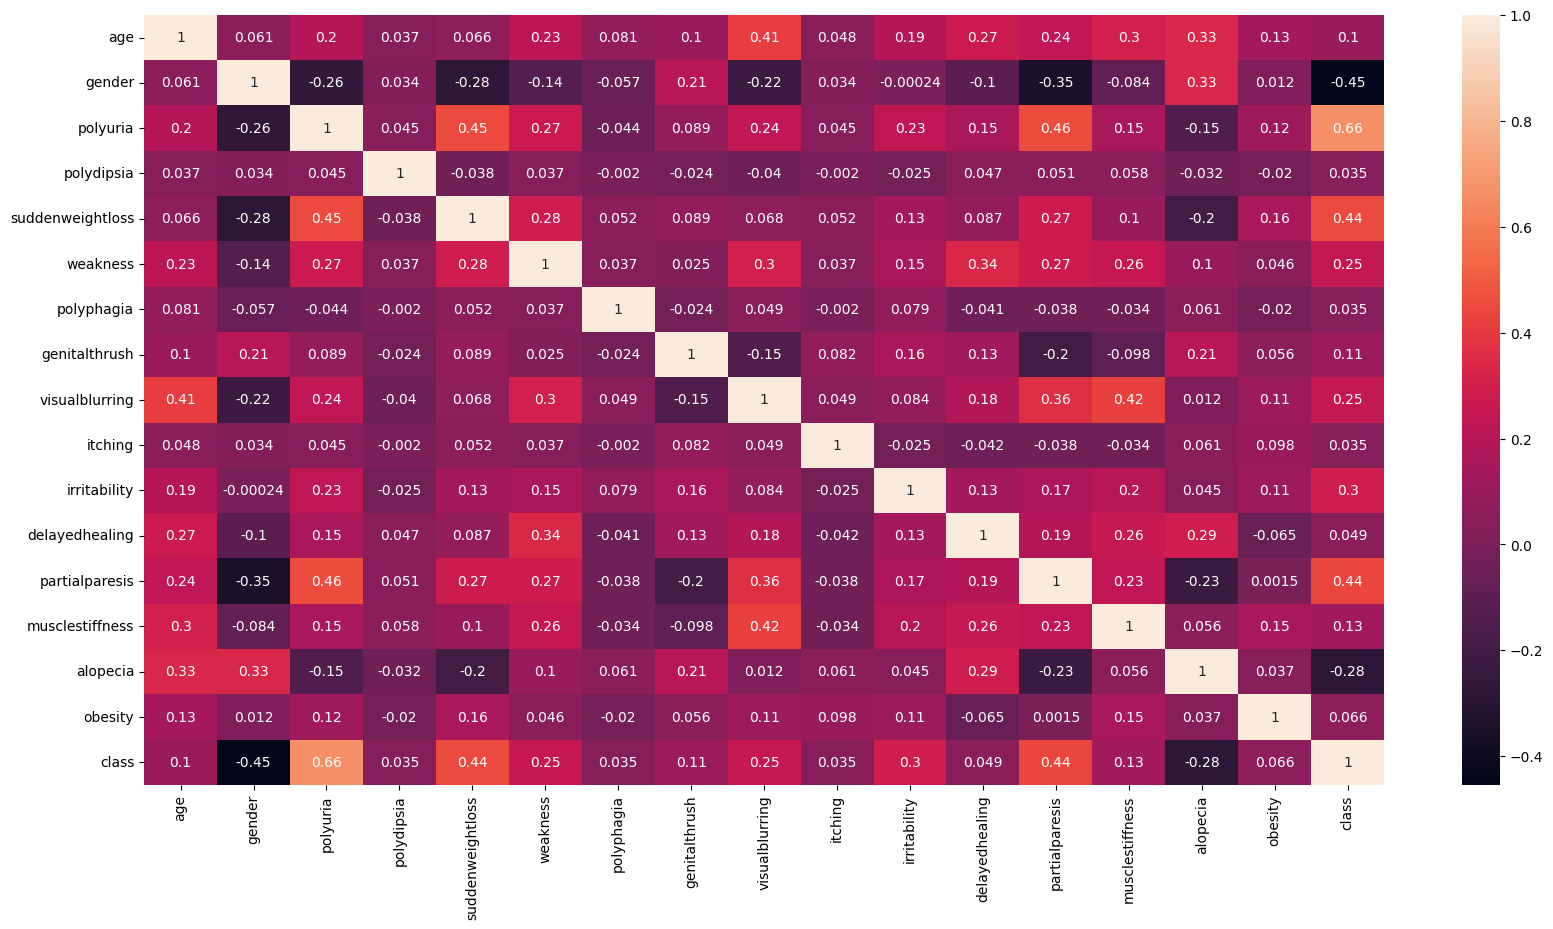

In [663]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cbar = True)
plt.show()

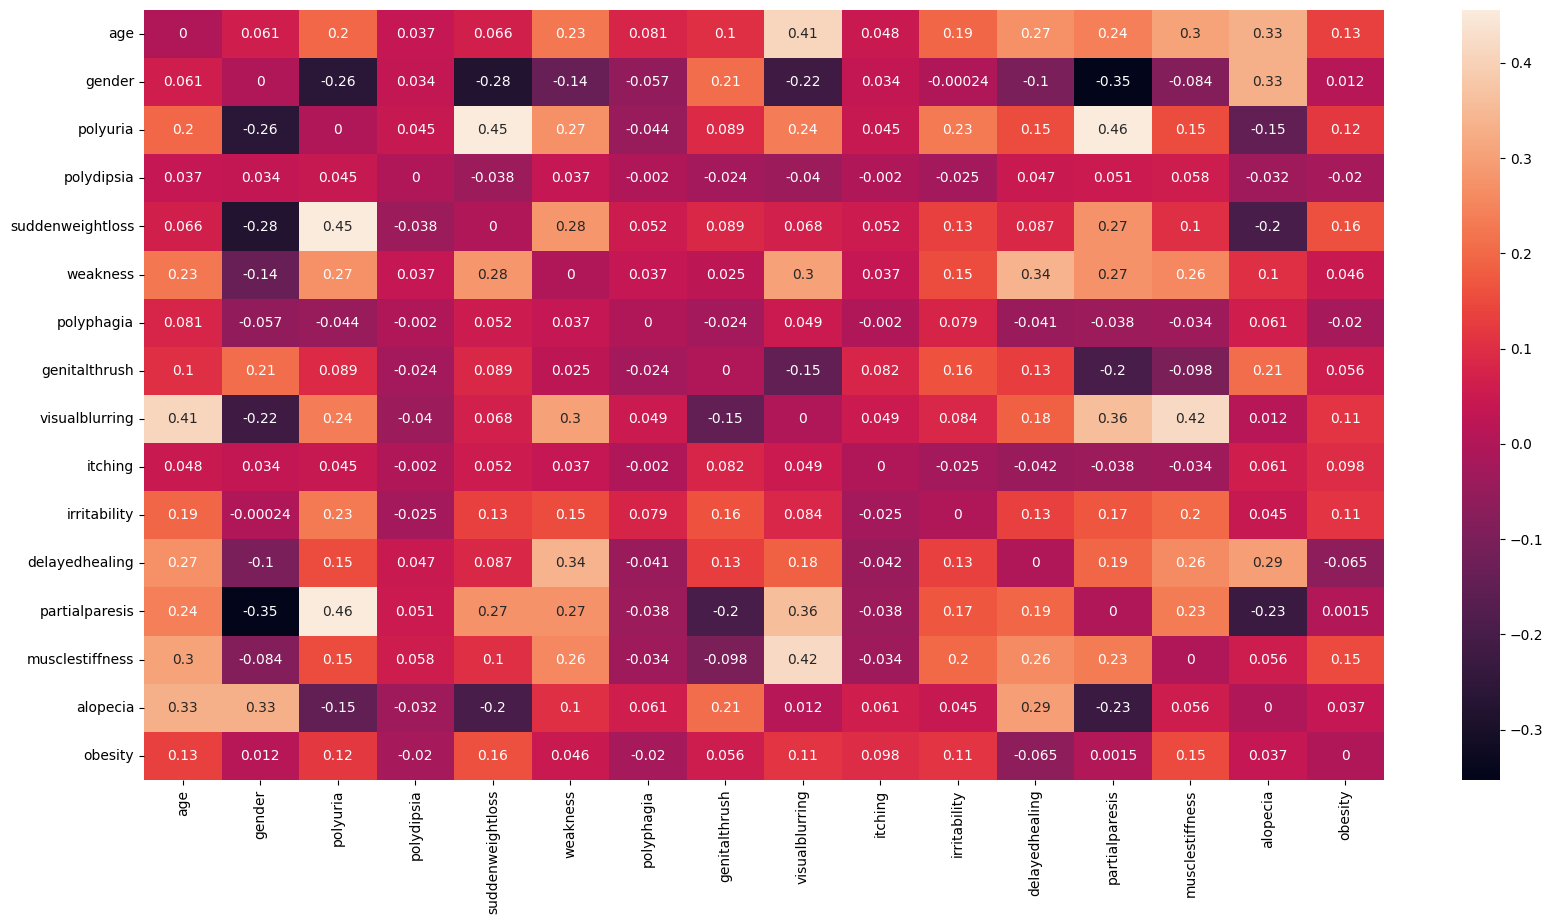

In [664]:
# 14. If the correlation is > 0.8 then delete all of them except 1 (Do not manually delete the columns, hint: use numpy.diag)

# Calculate the correlation matrix
new_df = df
new_df.drop('class', axis=1, inplace=True)
corr_matrix = new_df.corr()
corr_matrix[corr_matrix == 1] = 0
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot = True, cbar = True)
plt.show()

In [665]:
# Get the indices of highly correlated columns

correlated_columns = [col for col in range(len(corr_matrix.columns)) if any(abs(corr_matrix.iloc[:, col]) > 0.8)]
correlated_columns
# Keep the first column and drop the others
columns_to_drop = [corr_matrix.columns[col] for col in correlated_columns[1:]]
columns_to_drop



[]

In [666]:
new_df.drop(columns=columns_to_drop, axis=1, inplace=True)
new_df

,age,gender,polyuria,polydipsia,suddenweightloss,weakness,polyphagia,genitalthrush,visualblurring,itching,irritability,delayedhealing,partialparesis,musclestiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0.0,1.0,0,1.0,1,1
1,58,1,0,0,0,1,0,0,1,0,0.0,0.0,1,0.0,1,0
2,41,1,1,0,0,1,1,0,0,1,0.0,1.0,0,1.0,1,0
3,45,1,0,0,1,1,1,1,0,1,0.0,1.0,0,0.0,0,0
4,60,1,1,1,1,1,1,0,1,1,1.0,1.0,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0.0,1.0,1,0.0,0,0
516,48,0,1,1,1,1,1,0,0,1,1.0,1.0,1,0.0,0,0
517,58,0,1,1,1,1,1,0,1,0,0.0,0.0,1,1.0,0,1
518,32,0,0,0,0,1,0,0,1,1,0.0,1.0,0,0.0,1,0


AttributeError: Rectangle.set() got an unexpected keyword argument 'annot'

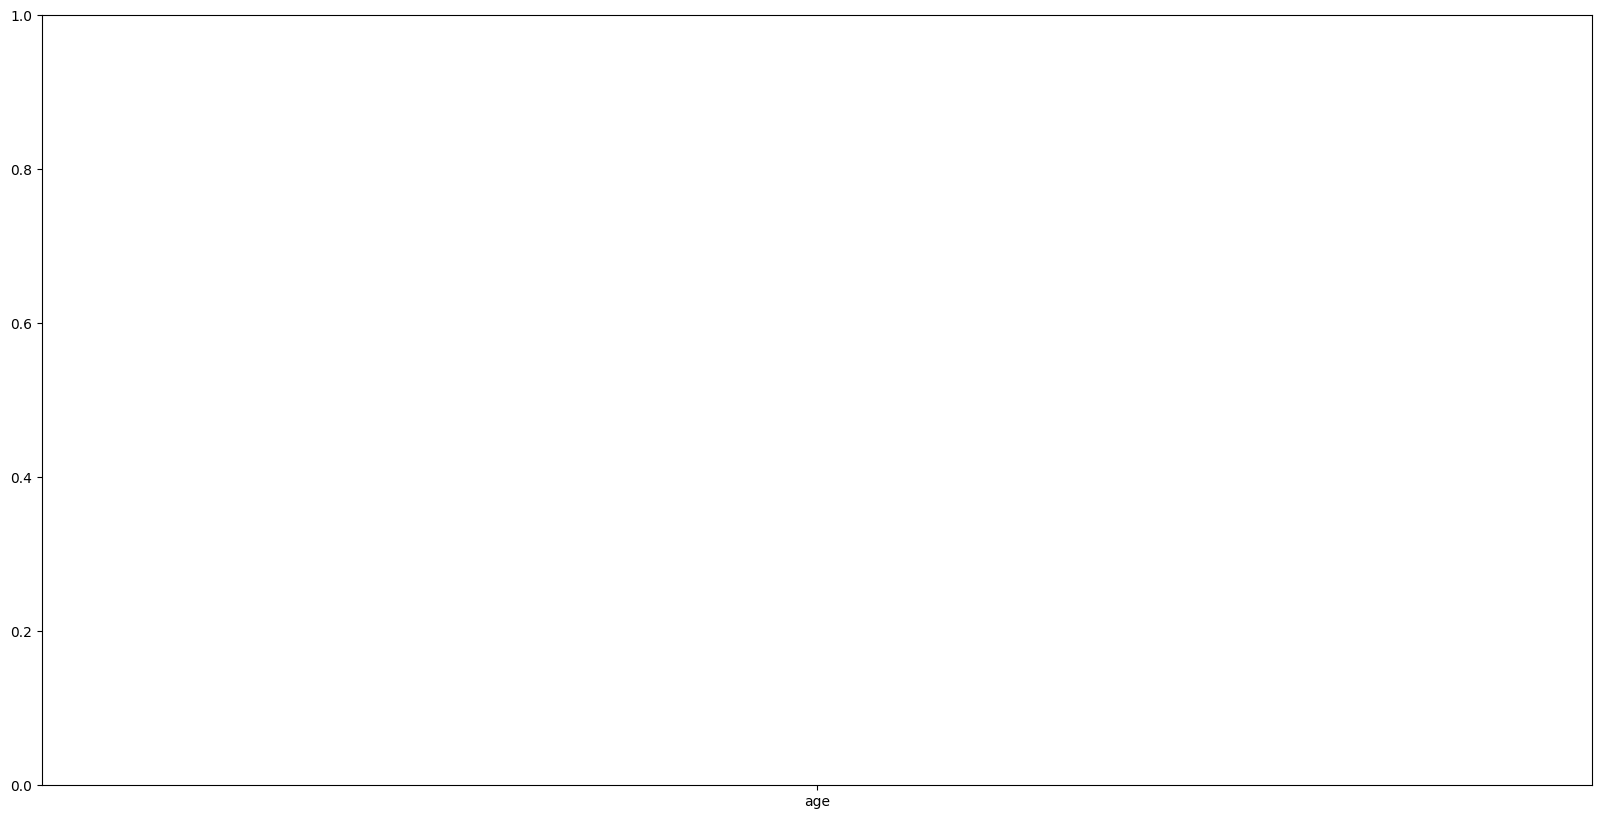

In [670]:
# 15. Plot a bar chart of dependent var count of categories and check if data is balanced or unbalanced. (hint : use sns.countplot)
plt.figure(figsize=(20,10))
sns.countplot(df)
plt.show()
